# Experimental time complexity analysis

## Goal
Experimental study of the time complexity of different algorithms

## Problems and methods
For each n from 1 to 2000, measure the average computer execution time (using timestamps) of programs implementing the algorithms and functions below for five runs. Plot the data obtained showing the average execution time as a function of n. Conduct the theoretical analysis of the time complexity of the algorithms in question and compare the empirical and theoretical time complexities.

I. Generate an n-dimensional random vector 𝒗 = [𝑣1, 𝑣2, … , 𝑣𝑛] with non-negative
elements. For 𝒗, implement the following calculations and algorithms:
1) 𝑓(𝒗) = 𝑐𝑜𝑛𝑠𝑡 (constant function);
2) 𝑓(𝒗) = ∑ 𝑣𝑘
𝑛
𝑘=1
(the sum of elements);
3) 𝑓(𝒗) = ∏ 𝑣𝑘
𝑛
𝑘=1
(the product of elements);
4) supposing that the elements of 𝒗 are the coefficients of a polynomial 𝑃 of
degree 𝑛 − 1, calculate the value 𝑃(1.5) by a direct calculation of 𝑃(𝑥) =
∑ 𝑣𝑘𝑥
𝑛 𝑘−1
𝑘=1
(i.e. evaluating each term one by one) and by Horner’s method
by representing the polynomial as
𝑃(𝑥) = 𝑣1 + 𝑥(𝑣2 + 𝑥(𝑣3 + ⋯ ));
5) Bubble Sort of the elements of 𝒗;
6) Quick Sort of the elements of 𝒗;
7) Timsort of the elements of 𝒗.
II. Generate random matrices 𝐴 and 𝐵 of size 𝑛 × 𝑛 with non-negative elements.
Find the usual matrix product for 𝐴 and 𝐵.
III. Describe the data structures and design techniques used within the algorithms.

## Content

### Part 1 : Time complexity of sample functions
### Part 2 : Visualize results 


-------

## Part 1 : Time complexity of sample functions

In [1]:
'''
    import lib
'''
import numpy as np 
import time
import pandas as pd 
import os 
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
from scipy.optimize import leastsq


In [2]:
class computation : 
    
    def func_const (v) :
        '''
            return constant 
        '''
        start = time.time()
        
        ret = 1 
        
        stop = time.time()
        time_cost = stop-start
        return ret,time_cost
    
    def func_sum(v) : 
        '''
            return sum of elements of a vector 
        '''
        start = time.time()
        
        ret = np.sum(v)
        
        stop = time.time()
        time_cost = stop-start
        return ret,time_cost
    
    
    def func_product(v) :
        '''
            return the product of elements of a vector
        '''
        
        start = time.time()
        
        ret = np.prod(v)
        
        stop = time.time()
        time_cost = stop-start
        return ret,time_cost
    
    
    def func_polynomial_direct(v,x) :
        '''
            v represent the coefficients of the polynomial
            where v[0] corresponds to the coefficient of the highest powerc
        ''' 
        start = time.time()
        ret = 0 
        for i in range (v.size-1,-1,-1) : 
            x=0
            x= x**i
            ret+= v[i]*x
        
        #vectorized implementation (faster than Horner's method4) 
        '''
            POW = np.arange(v.size)[::-1]
            x_power = x ** POW
            ret = np.dot(v,x_power)
        '''
        stop = time.time()
        time_cost = stop-start
        return ret,time_cost
        
    
    
    def func_polynomial_Horner(v,x) :
        '''
            v represent the coefficients of the polynomial 
            where v[0] corresponds to the coefficient of the highest power
        '''
        start = time.time()
        
        ret =np.polyval(v,x)
        
        stop = time.time()
        time_cost = stop-start
        return ret,time_cost
    
    
    def func_bubble_sort(v):
        '''
            bubble sort of vector v, manual implementation
        '''
        ret = v
        start = time.time()
        
        n = len(ret) 
        #loop over the all elements 
        for i in range(n-1): 
            for j in range(0, n-i-1): 
                # traverse the array from 0 to n-i-1 
                # Swap if the element found is greater 
                # than the next element 
                if ret[j] > ret[j+1] : 
                    ret[j], ret[j+1] = ret[j+1], ret[j] 
        
        
        stop = time.time()
        time_cost = stop-start
        return ret,time_cost
    
    
    
    def func_quick_sort(v):
        '''
            quick sort of vector v, numpy implementation
        '''
        start = time.time()
        
        ret = np.sort(v, kind='quicksort')
       
        stop = time.time()
        time_cost = stop-start
        return ret,time_cost
    
    
    def func_tim_sort(v):
        '''
            tim sort of vector v, numpy implementation, idicated by stable 
        '''
        start = time.time()
        
        ret = np.sort(v, kind='stable')
       
        stop = time.time()
        time_cost = stop-start
        return ret,time_cost
    
    
    
    def func_matrixmul(A,B) :
        '''
            multiply A and B using numpy 
        '''
        start = time.time()
        
        ret = np.dot(A,B)
       
        stop = time.time()
        time_cost = stop-start
        return ret,time_cost

In [69]:
#setup 
num = 100000
save_dir = '/home/ki/Downloads/'
steps= np.arange(1,2000)
names = ['const', 'sum','product','polynomial_direct',
             'polynomial_Horner','bubble_sort','quick_sort','tim_sort']
names =['tim_sort']

In [70]:
# loop to perform all nesseacry calculation and save results in csv format 
for method_name in names : 
    method_name = "func_"+method_name
    print(method_name)
    print('---------------')
    point_value = 1.5
    to_save = { 'steps' : steps, 'time_cost' : []}
    for n in tqdm(steps) :
       
        mean = 0 
        for iteration in range(5) : 
            method = getattr(computation,method_name)
            low=0                                        #min generated number
            V= np.random.uniform(size=n)         #generate random numbers using uniform distribution
            if method_name == "func_polynomial_direct" or method_name == "func_polynomial_Horner" : 
                
                ret,time_cost = method(V,point_value)
            elif method_name == "func_matrixmul" :
                A=np.random.rand(n,n)
                B=np.random.rand(n,n)
                ret,time_cost = method(A,B)
            else :  
                ret,time_cost = method(V)
               # print(time_cost)
           
            mean+=time_cost
        mean=mean/5
        to_save['time_cost'].append(mean)
    print(to_save['time_cost'][0])

    to_save_df =pd.DataFrame(data=to_save)
    full_name =os.path.join(save_dir, method_name+'.csv')  
    to_save_df.to_csv(full_name)

 35%|███▍      | 696/1999 [00:00<00:00, 6954.73it/s]

func_tim_sort
---------------


100%|██████████| 1999/1999 [00:00<00:00, 3221.09it/s]

1.0538101196289063e-05


In [60]:
#some helper functions 
def func_cal_poly(param,x) :
    ret = 0 
    for t in range (len(param)) : 
        ret+= param[t] * (x ** (len(param)-t-1) )
    return ret 


def nlogn(param,x) :
    return param[0] * x *np.log(x) + param[1]

def calculate_poly(param) :
    
    x = np.arange(1999)
    y= [func_cal_poly(param,i) for i in x]
    return y 

def calculat_nlogn(param) :
     x = np.arange(1999)
     y= [nlogn(param,i) for i in x]
     return y 



## Part 2 : Visualize results 

[5.63641268e-09 5.68471946e-06]


<ipython-input-60-e4583a1eca46>:10: RuntimeWarning: divide by zero encountered in log
  return param[0] * x *np.log(x) + param[1]
<ipython-input-60-e4583a1eca46>:10: RuntimeWarning: invalid value encountered in double_scalars
  return param[0] * x *np.log(x) + param[1]
<ipython-input-73-0adce026caf8>:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


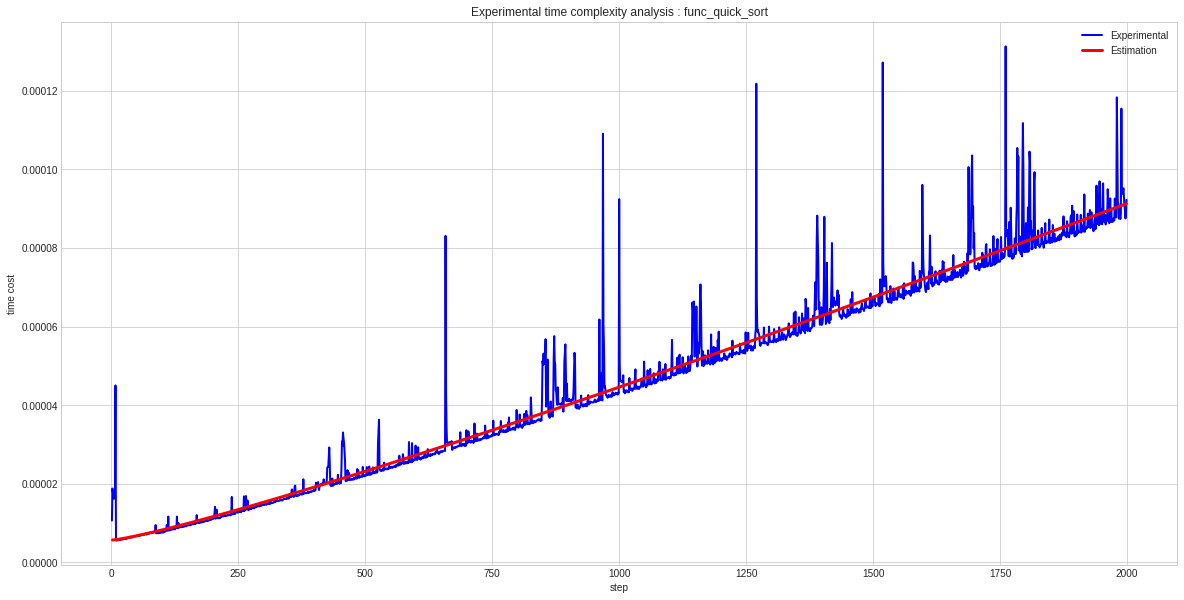

In [73]:
'''
    for visualizing  time complexity estimation 
'''

method_name = "quick_sort"
method_name = "func_"+method_name
df = pd.read_csv(save_dir+method_name+'.csv')

# for polynomial estimation (least squares using numpy) 
'''
deg = 2
param = np.polyfit(np.array(df['steps']),np.array(df['time_cost']),deg)
print(param)
est = calculate_poly(param)
'''




# approximation using a custom function (using scipy)

loss_fucntion = lambda param,x,y: nlogn(param,x)-y
initail_param = [1.0,1.0]
optimize,succ = leastsq(loss_fucntion,initail_param[:],args=(df['steps'],df['time_cost']))
print(optimize)
est =calculat_nlogn(optimize)






fig = plt.figure(figsize=(20,10))
plt.title("Experimental time complexity analysis : " + method_name)
plt.xlabel("step")
plt.ylabel("time cost")
ax = plt.axes()

ax.plot(df['steps'],df['time_cost'],color='blue', label='Experimental',linewidth=2)
ax.plot(df['steps'],est,color='red', label='Estimation',linewidth=3)
plt.legend();


<ipython-input-44-b56e76bf98ca>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


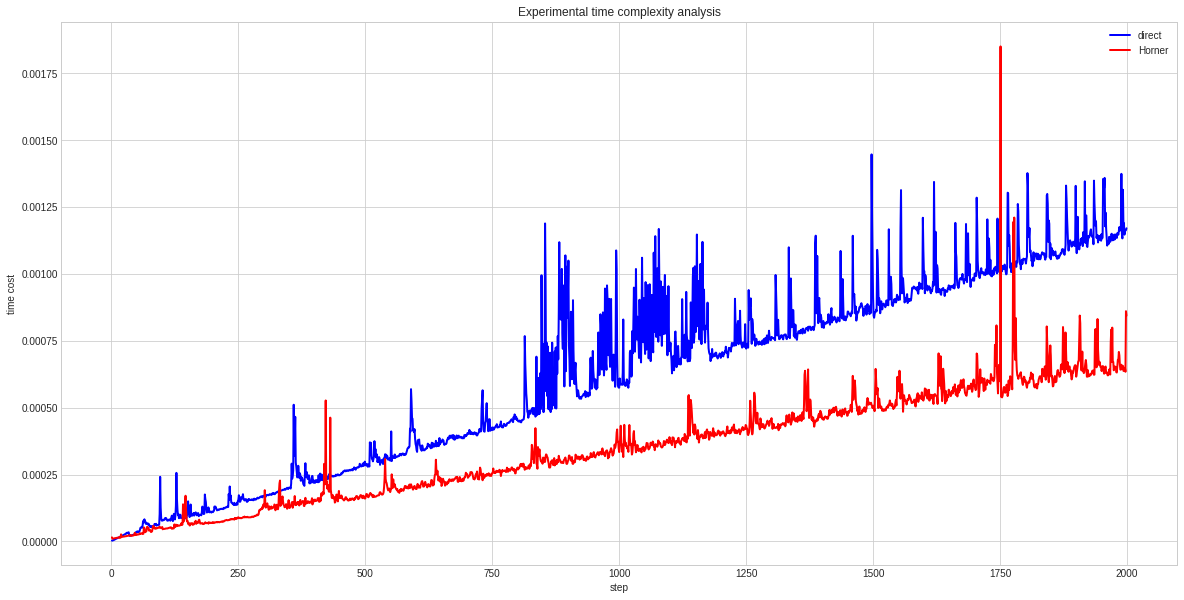

In [44]:
'''
    for visualizing  time complexity estimation  for direct polynomial calculation and Horner's calculation method 
'''
method_name = "polynomial_direct"
method_name = "func_"+method_name
df_direct = pd.read_csv(save_dir+method_name+'.csv')

method_name = "polynomial_Horner"
method_name = "func_"+method_name
df_Horner = pd.read_csv(save_dir+method_name+'.csv')

fig = plt.figure(figsize=(20,10))
plt.title("Experimental time complexity analysis")
plt.xlabel("step")
plt.ylabel("time cost")
ax = plt.axes()

ax.plot(df_direct['steps'],df_direct['time_cost'],color='blue', label='direct',linewidth=2)
ax.plot(df_Horner['steps'],df_Horner['time_cost'],color='red', label='Horner',linewidth=2)
plt.legend();